<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries-and-data" data-toc-modified-id="Load-libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries and data</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Inspect-and-visualize-the-data" data-toc-modified-id="Inspect-and-visualize-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inspect and visualize the data</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualizations</a></span></li></ul></li><li><span><a href="#Model-the-data" data-toc-modified-id="Model-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model the data</a></span><ul class="toc-item"><li><span><a href="#Create-validation-data-set" data-toc-modified-id="Create-validation-data-set-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create validation data set</a></span></li><li><span><a href="#Build-models" data-toc-modified-id="Build-models-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Build models</a></span><ul class="toc-item"><li><span><a href="#Initial-pass---Linear-and-nonlinear-models" data-toc-modified-id="Initial-pass---Linear-and-nonlinear-models-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Initial pass - Linear and nonlinear models</a></span><ul class="toc-item"><li><span><a href="#Standardize-the-data-and-run-the-models" data-toc-modified-id="Standardize-the-data-and-run-the-models-4.2.1.1"><span class="toc-item-num">4.2.1.1&nbsp;&nbsp;</span>Standardize the data and run the models</a></span></li><li><span><a href="#Best-model-hyperparameter-tuning" data-toc-modified-id="Best-model-hyperparameter-tuning-4.2.1.2"><span class="toc-item-num">4.2.1.2&nbsp;&nbsp;</span>Best model hyperparameter tuning</a></span></li></ul></li><li><span><a href="#Initial-pass---Ensemble-methods" data-toc-modified-id="Initial-pass---Ensemble-methods-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Initial pass - Ensemble methods</a></span></li></ul></li></ul></li></ul></div>

# Load libraries and data

In [272]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [273]:
# Load libraries
import os

import numpy as np
from numpy import arange

from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from pandas import DataFrame

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [274]:
dataFile = os.path.join(".", "datasets", "housing.csv")
data = read_csv(dataFile, header = 0, delim_whitespace = True)

# Helper functions

In [275]:
def corrTableColors(value):
    color = 'black'

    if value == 1:
        color = 'white'
    elif value < -0.7:
        color = 'red'
    elif value > 0.7:
        color = 'green'

    return 'color: %s' % color

# Inspect and visualize the data

## Descriptive statistics

In [276]:
print("data.shape = ", data.shape)

data.shape =  (506, 14)


In [277]:
print(data.head(20))
print("--------")
print(data.dtypes)

     CRIM    ZN  INDUS  CHAS    NOX     RM    AGE    DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0   0.006  18.0   2.31     0  0.538  6.575   65.2  4.090    1  296.0     15.3  396.90   4.98  24.0
1   0.027   0.0   7.07     0  0.469  6.421   78.9  4.967    2  242.0     17.8  396.90   9.14  21.6
2   0.027   0.0   7.07     0  0.469  7.185   61.1  4.967    2  242.0     17.8  392.83   4.03  34.7
3   0.032   0.0   2.18     0  0.458  6.998   45.8  6.062    3  222.0     18.7  394.63   2.94  33.4
4   0.069   0.0   2.18     0  0.458  7.147   54.2  6.062    3  222.0     18.7  396.90   5.33  36.2
5   0.030   0.0   2.18     0  0.458  6.430   58.7  6.062    3  222.0     18.7  394.12   5.21  28.7
6   0.088  12.5   7.87     0  0.524  6.012   66.6  5.561    5  311.0     15.2  395.60  12.43  22.9
7   0.145  12.5   7.87     0  0.524  6.172   96.1  5.950    5  311.0     15.2  396.90  19.15  27.1
8   0.211  12.5   7.87     0  0.524  5.631  100.0  6.082    5  311.0     15.2  386.63  29.93  16.5
9   0.170 

In [278]:
set_option('display.width', 200)
set_option('precision', 2)
data.describe()

CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX  PTRATIO       B   LSTAT    MEDV
count  5.06e+02  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   506.00  506.00  506.00  506.00
mean   3.61e+00   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55  408.24    18.46  356.67   12.65   22.53
std    8.60e+00   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71  168.54     2.16   91.29    7.14    9.20
min    6.32e-03    0.00    0.46    0.00    0.39    3.56    2.90    1.13    1.00  187.00    12.60    0.32    1.73    5.00
25%    8.20e-02    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00  279.00    17.40  375.38    6.95   17.02
50%    2.57e-01    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00  330.00    19.05  391.44   11.36   21.20
75%    3.68e+00   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00  666.00    20.20  396.23   16.96   25.00
max    8.90e+01  100.00   27.74    1.00    0.87    8.78  100.00   12.13   24.00  711.00    22.00  396.90   37.97   50.00

In [279]:
corr = data.corr(method = "pearson")
corr.style.applymap(corrTableColors)

## Visualizations

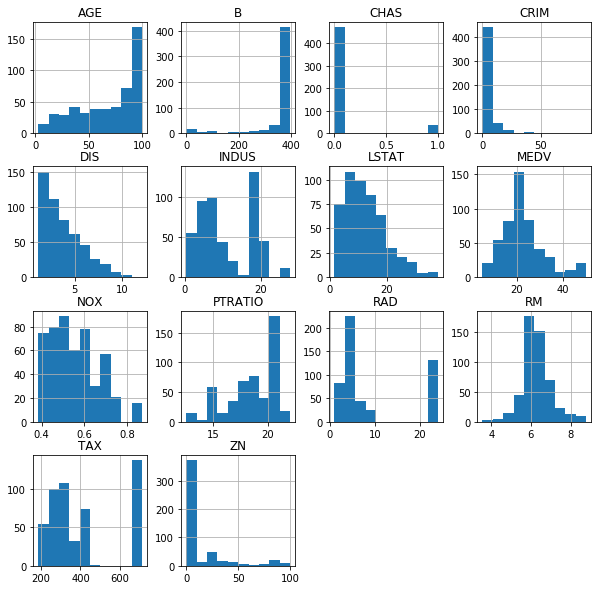

In [280]:
data.hist(figsize = (10,10), sharex = False, sharey = False)
pyplot.show()

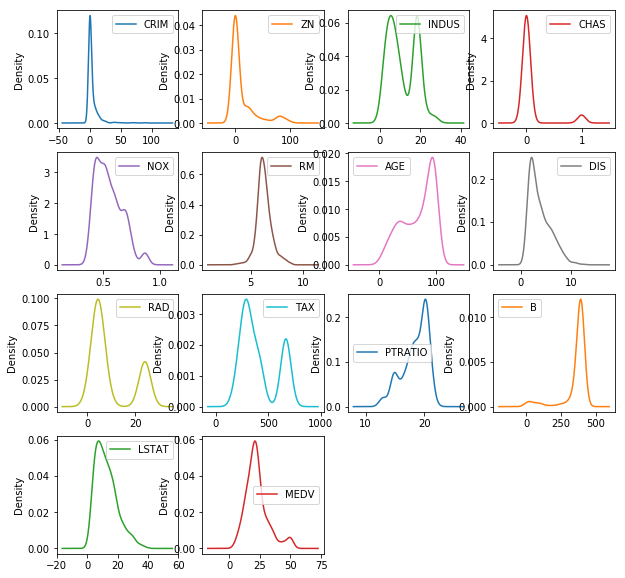

In [281]:
data.plot(kind = 'density', subplots = True, layout = (4,4), figsize = (10,10), sharex = False, sharey = False)
pyplot.show()

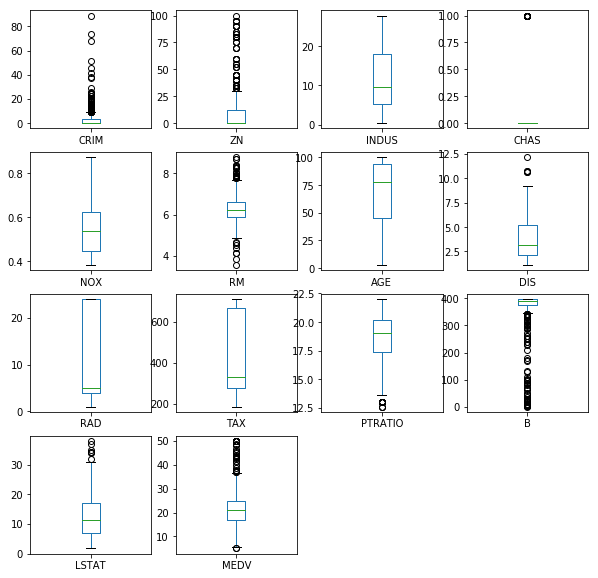

In [282]:
data.plot(kind="box", subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (10,10))
pyplot.show()

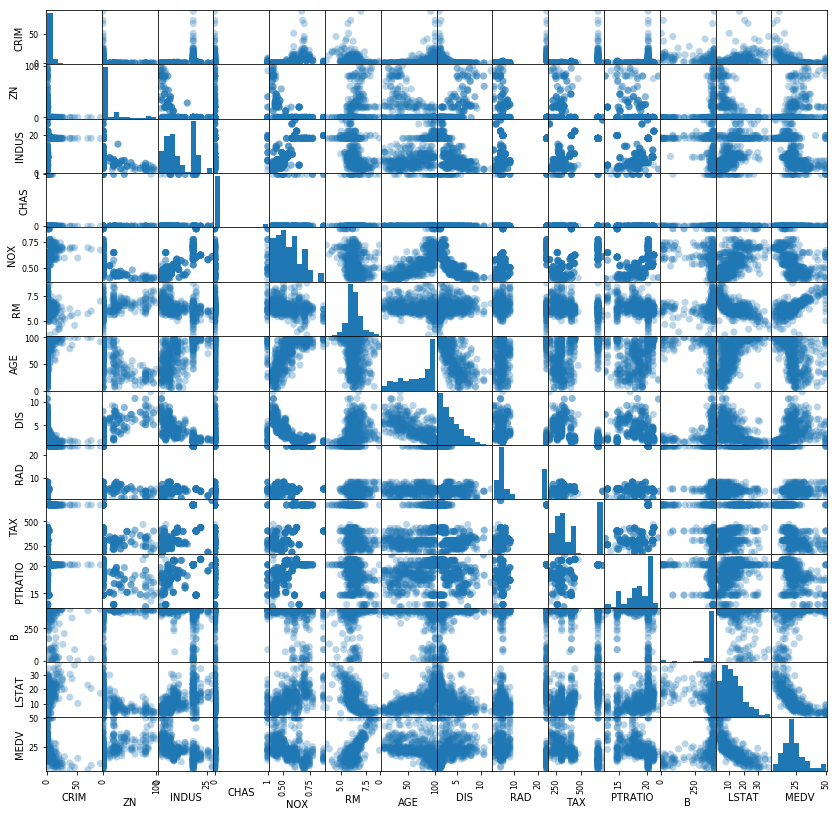

In [283]:
scatter_matrix(data, figsize=(14, 14), alpha = 0.3, s = 200)
pyplot.show()

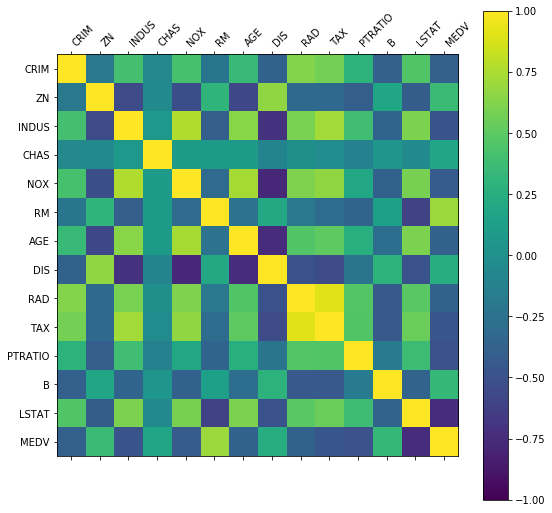

In [284]:
figure = pyplot.figure(figsize=(9, 9))
axis = figure.add_subplot(111)
graph = axis.matshow(corr, vmin = -1, vmax = 1)
figure.colorbar(graph)
ticks = np.arange(0, 14, 1)
axis.set_xticks(ticks)
axis.set_yticks(ticks)
axis.set_xticklabels(list(data)[0:14], rotation='45', ha = 'left')
axis.set_yticklabels(list(data)[0:14])
pyplot.show()

In [285]:
data.loc[1:3, data.columns != 'MEDV']

CRIM   ZN  INDUS  CHAS   NOX    RM   AGE   DIS  RAD    TAX  PTRATIO       B  LSTAT
1  0.03  0.0   7.07     0  0.47  6.42  78.9  4.97    2  242.0     17.8  396.90   9.14
2  0.03  0.0   7.07     0  0.47  7.18  61.1  4.97    2  242.0     17.8  392.83   4.03
3  0.03  0.0   2.18     0  0.46  7.00  45.8  6.06    3  222.0     18.7  394.63   2.94

# Model the data

## Create validation data set

In [286]:
# Seperate X and Y values
x = data.values[:, 0:len(data.columns) - 1]
y = data.values[:, len(data.columns) - 1]

print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

# Split out validation set -- 80/20 split
seed = 10
valSize = 0.2

xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size = valSize, random_state = seed)

print("--------")
print("xTrain.shape = ", xTrain.shape)
print("yTrain.shape = ", yTrain.shape)
print("xVal.shape = ", xVal.shape)
print("yVal.shape = ", yVal.shape)

x.shape =  (506, 13)
y.shape =  (506,)
--------
xTrain.shape =  (404, 13)
yTrain.shape =  (404,)
xVal.shape =  (102, 13)
yVal.shape =  (102,)


## Build models

### Initial pass - Linear and nonlinear models

In [287]:
# Init vars
folds = 10
seed = 10

# Use MSE since this is a regression problem
score = 'neg_mean_squared_error'

# Instantiate model objects
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# Create a Pandas DF to hold all our spiffy results
df = DataFrame(columns = ['Model', 'MSE', 'StdDev'])

# Run the models
for modelName, model in models:
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = folds, random_state = seed)
    results[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = score)
    df.loc[len(df)] = list([modelName, results[modelName].mean(), results[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
df.sort_values(by = ['MSE', 'StdDev', 'Model'], ascending = [False, True, True])

Model    MSE  StdDev
0      LR -21.26    7.11
6      LR -21.26    7.11
4    CART -22.85   10.23
10   CART -23.66   10.83
2      EN -24.38    9.38
8      EN -24.38    9.38
1   LASSO -25.67    9.79
7   LASSO -25.67    9.79
3     KNN -36.77    7.35
9     KNN -36.77    7.35
5     SVR -76.46   17.22
11    SVR -76.46   17.22

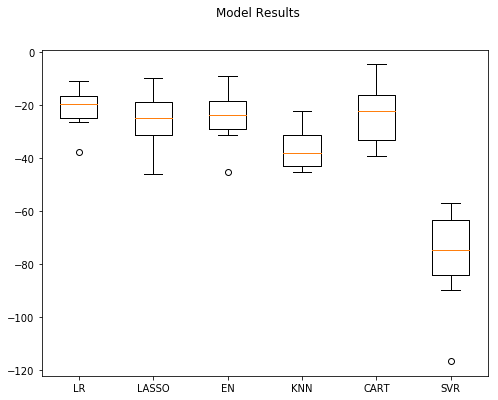

In [288]:
figure = pyplot.figure(figsize = (8,6))
figure.suptitle("Model Results")
axis = figure.add_subplot(111)
pyplot.boxplot(results.values())
axis.set_xticklabels(results.keys())
pyplot.show()

#### Standardize the data and run the models

In [289]:
# Init vars and params
scaledModels = []
scaledResults = {}
scaledFolds = 10
scaledSeed = 10

# Use MSE since this is a regression problem
score = 'neg_mean_squared_error'

# Setup the pipelines
pipes = []

# Create a Pandas DF to hold all our spiffy results
scaledDF = DataFrame(columns = ['Model', 'MSE', 'StdDev'])

# Create the scaled model objects
for modelName, model in models:
    pipes.append(('scaled' + modelName, Pipeline([('Scaler', StandardScaler()),(modelName, model)])))

# Run the models
for modelName, model in pipes:
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = scaledFolds, random_state = scaledSeed)
    scaledResults[modelName] = cross_val_score(model, xTrain, yTrain, cv=kFold, scoring = score)
    scaledDF.loc[len(scaledDF)] = list([modelName, scaledResults[modelName].mean(), scaledResults[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
print(scaledDF.sort_values(by = ['MSE', 'StdDev', 'Model'], ascending = [False, True, True]))


          Model    MSE  StdDev
3     scaledKNN -20.35   11.87
9     scaledKNN -20.35   11.87
4    scaledCART -20.66    9.07
0      scaledLR -21.26    7.11
6      scaledLR -21.26    7.11
10   scaledCART -25.76   14.54
1   scaledLASSO -26.94   10.38
7   scaledLASSO -26.94   10.38
5     scaledSVR -28.52   13.98
11    scaledSVR -28.52   13.98
2      scaledEN -28.60   11.65
8      scaledEN -28.60   11.65


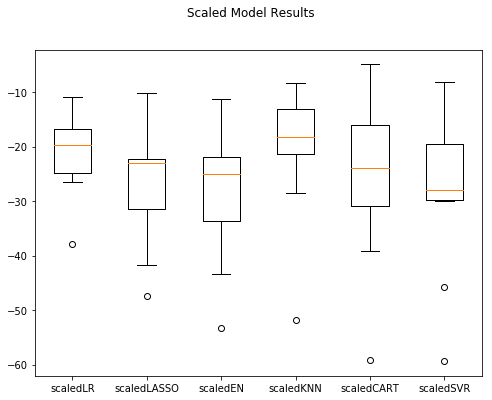

In [290]:
figure = pyplot.figure(figsize = (8,6))
figure.suptitle("Scaled Model Results")
axis = figure.add_subplot(111)
pyplot.boxplot(scaledResults.values())
axis.set_xticklabels(scaledResults.keys())
pyplot.show()

#### Best model hyperparameter tuning

In [291]:
# Tune top model's hyperparameters via grid search
xVals = StandardScaler().fit(xTrain).transform(xTrain)
kVals = list(range(1,25,2))

gridParams = dict(n_neighbors=kVals)
knnModel = KNeighborsRegressor()

kFold = KFold(n_splits=scaledFolds, random_state=scaledSeed)
grid = GridSearchCV(estimator=knnModel, param_grid=gridParams, scoring=score, cv=kFold)
gridResults = grid.fit(xVals, yTrain)

In [292]:
_ = [gridResults.cv_results_['mean_test_score'], gridResults.cv_results_['std_test_score'], gridResults.cv_results_['params']]

knnDF = DataFrame(np.array(_).T, columns = ['MSE', 'StdDev', 'KNN Value'])

set_option('display.width', 600)
set_option('precision', 3)

knnDF.sort_values(by = ['MSE', 'StdDev'], ascending = [False, True])

MSE StdDev            KNN Value
1  -18.7   12.2   {'n_neighbors': 3}
3  -18.9   12.7   {'n_neighbors': 7}
4  -19.8   12.4   {'n_neighbors': 9}
2    -20   11.8   {'n_neighbors': 5}
5  -20.2   12.1  {'n_neighbors': 11}
6  -20.7   12.8  {'n_neighbors': 13}
7  -21.5   13.2  {'n_neighbors': 15}
8  -22.8   13.6  {'n_neighbors': 17}
9    -24   13.6  {'n_neighbors': 19}
10 -24.5   13.9  {'n_neighbors': 21}
11 -25.3   14.2  {'n_neighbors': 23}
0  -25.7   12.4   {'n_neighbors': 1}

### Initial pass - Ensemble methods

In [295]:
# Init vars and params
eModels = []
eResults = {}
eFolds = 10
eSeed = 10

# Use MSE since this is a regression problem
eScore = 'neg_mean_squared_error'

# Create a Pandas DF to hold all our spiffy results
eDF = DataFrame(columns = ['Model', 'MSE', 'StdDev'])

# Create the scaled model objects
eModels.append(('scaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
eModels.append(('scaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
eModels.append(('scaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
eModels.append(('scaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

# Run the models
for modelName, model in eModels:
    # Implement K-fold cross validation where K = 10
    kFold = KFold(n_splits = eFolds, random_state = eSeed)
    eResults[modelName] = cross_val_score(model, xTrain, yTrain, cv = kFold, scoring = eScore)
    eDF.loc[len(eDF)] = list([modelName, eResults[modelName].mean(), eResults[modelName].std()])

# Print results sorted by Mean desc, StdDev asc, Model asc
print(eDF.sort_values(by = ['MSE', 'StdDev', 'Model'], ascending = [False, True, True]))


       Model     MSE  StdDev
1  scaledGBM  -9.974   5.693
3   scaledET -10.179   6.079
2   scaledRF -13.889   7.339
0   scaledAB -14.561   8.249


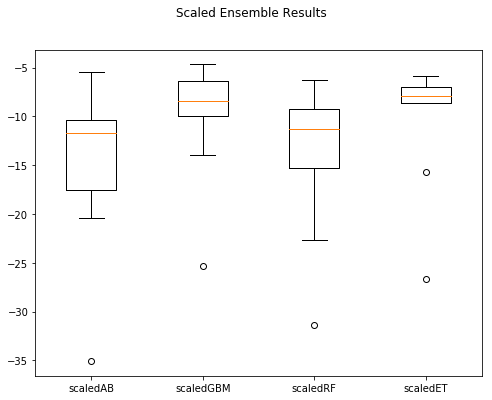

In [296]:
figure = pyplot.figure(figsize = (8,6))
figure.suptitle("Scaled Ensemble Results")
axis = figure.add_subplot(111)
pyplot.boxplot(eResults.values())
axis.set_xticklabels(eResults.keys())
pyplot.show()

#### Best model hyperparameter tuning

In [300]:
# Tune top model's hyperparameters via grid search
xVals = StandardScaler().fit(xTrain).transform(xTrain)
estimatorVals = list(range(50,500,50))

gridParams = dict(n_estimators = estimatorVals)
gbmModel = GradientBoostingRegressor(random_state = eSeed)

kFold = KFold(n_splits = eFolds, random_state = eSeed)
grid = GridSearchCV(estimator=gbmModel, param_grid = gridParams, scoring = eScore, cv = kFold)
gridResults = grid.fit(xVals, yTrain)

In [301]:
_ = [gridResults.cv_results_['mean_test_score'], gridResults.cv_results_['std_test_score'], gridResults.cv_results_['params']]

knnDF = DataFrame(np.array(_).T, columns = ['MSE', 'StdDev', '# Estimators'])

set_option('display.width', 600)
set_option('precision', 3)

knnDF.sort_values(by = ['MSE', 'StdDev'], ascending = [False, True])

MSE StdDev           # Estimators
7 -9.55   5.36  {'n_estimators': 400}
6 -9.55    5.4  {'n_estimators': 350}
4 -9.56   5.56  {'n_estimators': 250}
8 -9.56   5.35  {'n_estimators': 450}
5 -9.57   5.45  {'n_estimators': 300}
3 -9.61   5.62  {'n_estimators': 200}
2 -9.67   5.68  {'n_estimators': 150}
1 -9.83   5.63  {'n_estimators': 100}
0 -10.5   6.07   {'n_estimators': 50}

In [297]:
list(range(50,500,50))

[50, 100, 150, 200, 250, 300, 350, 400, 450]